In [447]:
import warnings 
warnings.filterwarnings('ignore')


In [448]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [449]:
data = [
    ['Amsterdam',478],
    ['Sydney',1633],
    ['Vienna',250],
    ['Stockholm',586],
    ['Copenhagen',340],
    ['Helsinki',371],
    ['Fukoka',415],
    ['Berlin',573],
    ['Barcelona',485],
    ['Vancouver',601],
    ['Melbourne',327],
    ['Beijing',2044],
    ['Bangkok',620],
    ['Buenos Aires',500],
    ['Toronto',433],
    ['Madrid',575],
    ['Jakarta',418],
    ['Seoul',456],
    ['Frankfurt',448],
    ['Geneva',100],
    ['Tel Aviv',419],
    ['Istanbul',2423],
    ['Cairo',881],
    ['Taipei',331],
    ['Los Angeles',2406],
    ['Mumbai',3255],
    ['Boston',1063],
    ['Dublin',255],
    ['Tokyo',886],
    ['Chicago',551],
    ['Hong Kong',1189],
    ['Shanghai',1587],
    ['Brussels',177],
    ['San Francisco',973],
    ['Paris',500],
    ['Sao Paulo',3119],
    ['Zurich',186],
    ['London',879],
    ['Johannesburg',577],
    ['Milan',3848],
    ['Washington, D.C.',174],
    ['New York',4196],
    ['Moscow',2095],
    ['Mexico City',2649]
    
]
df= pd.DataFrame(data, columns=['City','Number of Gyms'])

In [450]:
print(df)

                City  Number of Gyms
0          Amsterdam             478
1             Sydney            1633
2             Vienna             250
3          Stockholm             586
4         Copenhagen             340
5           Helsinki             371
6             Fukoka             415
7             Berlin             573
8          Barcelona             485
9          Vancouver             601
10         Melbourne             327
11           Beijing            2044
12           Bangkok             620
13      Buenos Aires             500
14           Toronto             433
15            Madrid             575
16           Jakarta             418
17             Seoul             456
18         Frankfurt             448
19            Geneva             100
20          Tel Aviv             419
21          Istanbul            2423
22             Cairo             881
23            Taipei             331
24       Los Angeles            2406
25            Mumbai            3255
2

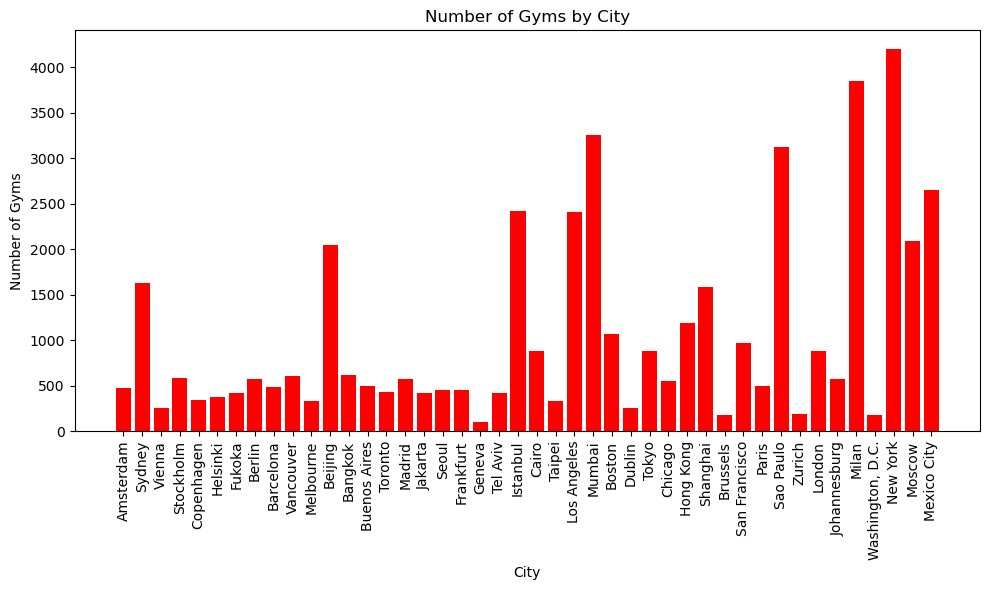

In [451]:
plt.figure(figsize=(10,6))
plt.bar(df["City"], df["Number of Gyms"], color = "red")
plt.xlabel("City")
plt.ylabel("Number of Gyms")
plt.title("Number of Gyms by City")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [452]:
pop= pd.read_csv('/Users/freddycazares/Documents/Boot Camp/Git/healthy_lifestyle_city_2021.csv')


In [453]:
def classify_training_preferences(row):
    outdoor_activities=row['Outdoor activities(City)']
    if outdoor_activities> pop['Outdoor activities(City)'].median():
        return 'Outdoor/Marathon'
    elif outdoor_activities < pop['Outdoor activities(City)'].median()/2:
        return 'Home Workouts'
    else:
        return 'Gym Workouts'

In [454]:
pop["Training Preferences"] = pop.apply(classify_training_preferences,axis=1)

In [455]:
merged_df = pd.merge(df,pop, on='City')

In [456]:
print(merged_df)

                City  Number of Gyms  Rank Sunshine hours(City)  \
0          Amsterdam             478     1                 1858   
1             Sydney            1633     2                 2636   
2             Vienna             250     3                 1884   
3          Stockholm             586     4                 1821   
4         Copenhagen             340     5                 1630   
5           Helsinki             371     6                 1662   
6             Berlin             573     8                 1626   
7          Barcelona             485     9                 2591   
8          Vancouver             601    10                 1938   
9          Melbourne             327    11                 2363   
10           Beijing            2044    12                 2671   
11           Bangkok             620    13                 2624   
12      Buenos Aires             500    14                 2525   
13           Toronto             433    15                 206

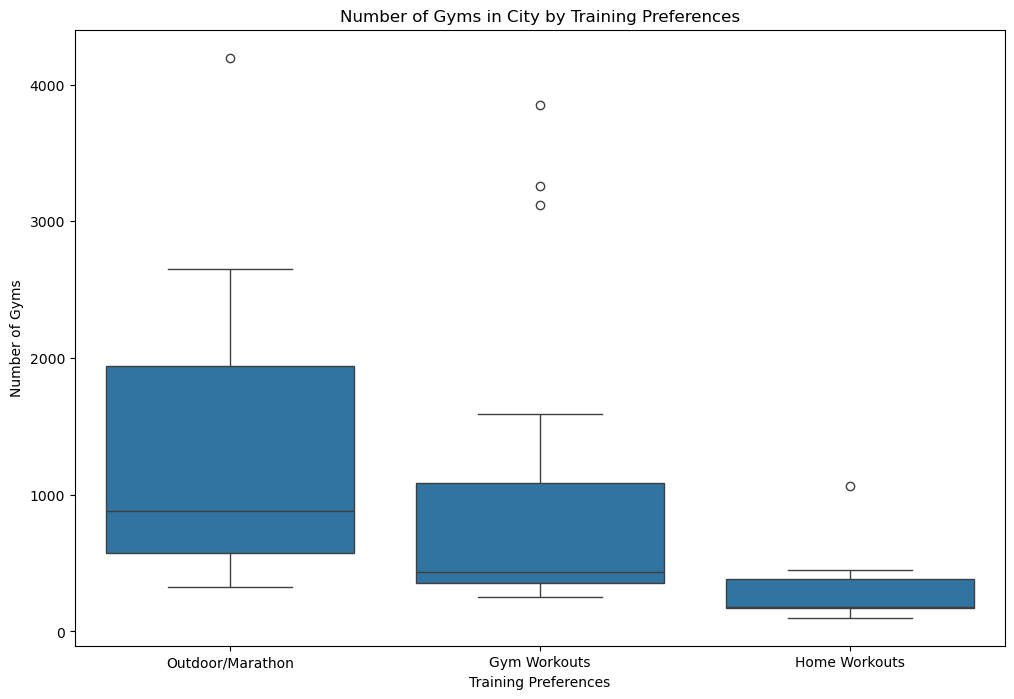

In [457]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Training Preferences',y='Number of Gyms',data=merged_df)
plt.title('Number of Gyms in City by Training Preferences')
plt.xlabel('Training Preferences')
plt.ylabel('Number of Gyms')
plt.show()

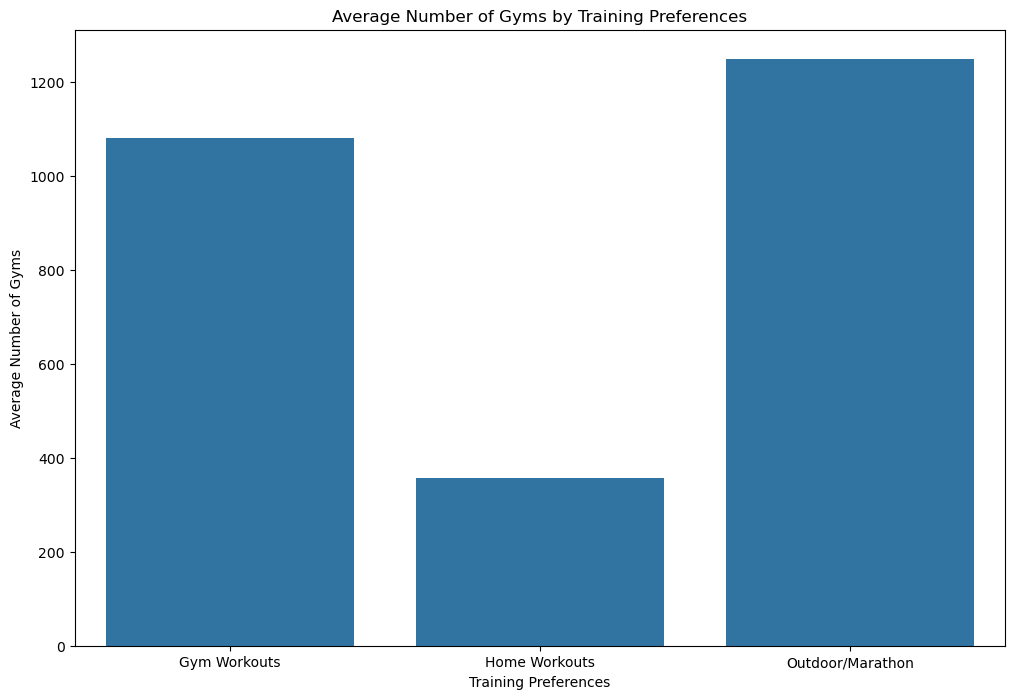

In [458]:
# Visualize the average number of gyms for each training preference
plt.figure(figsize=(12, 8))
avg_cost = merged_df.groupby('Training Preferences')['Number of Gyms'].mean().reset_index()
sns.barplot(x='Training Preferences', y='Number of Gyms', data=avg_cost)
plt.title('Average Number of Gyms by Training Preferences')
plt.xlabel('Training Preferences')
plt.ylabel('Average Number of Gyms')
plt.show()

In [459]:
outdoor = merged_df[merged_df['Training Preferences']== 'Outdoor/Marathon']['Number of Gyms']
gym = merged_df[merged_df['Training Preferences']== 'Gym Workouts']['Number of Gyms']
home = merged_df[merged_df['Training Preferences']== 'Home Workouts']['Number of Gyms']
stats.f_oneway(outdoor, gym, home)

F_onewayResult(statistic=1.7318462745669077, pvalue=0.18996230363946046)